## Rastgele Orman (Random Forest) Algoritması Nedir? 

Rastgele Orman algoritması denetimli bir sınıflandırma algoritmasıdır. Basit olarak algoritma rastgele olarak bir orman yaratır. 
Algoritmadaki ağaç sayısı ve elde edebileceği sonuç arasında doğrudan bir ilişki bulunmaktadır. 
Ağaç sayısı arttıkça kesin bir sonuç elde edilir.

Rastgele Orman algoritması temelde birden çok Karar Ağacının birleşmesi ile oluşur. Karar Ağacı algoritması ile arasındaki fark, Rastgele Orman’da kök üğümü (Root Node) bulma ve düğümleri bölme işlemlerinin rastgele çalışıyor olmasıdır.

#### Neden Rastgele Orman Algoritması?

Rastgele orman algoritması hem sınıflandırma ve regresyon görevlerinde kullanılabilir. Aynı zamanda Aşırı Uyum (Overfitting) sonuçları kötü yönde etkileyen kritik bir sorundur ancak Rastgele Orman algoritması için, ormanda yeteri kadar ağaç bulunuyorsa Aşırı Uyum probleminin ortaya çıkma ihtimali azalır. Üçüncü avantaj ise Rastgele Orman algoritmasının sınıflandırıcı eksik olan değerleri ele alabilir ve son olarak Rastgele Orman algoritmasının sınıflandırıcı kategorik değerler için modellenebilir.

#### Rastgele Orman Algoritması Teknikleri:
Topluluk Öğrenme: Birden fazla öğrenme modelinin birleştirilerek daha iyi performans elde edilmesi prensibidir. Rastgele orman, birden fazla karar ağacının birleşiminden oluşur.

Bagging (Bootstrap Aggregating): Rastgele ormanda kullanılan ana tekniktir. Bagging, farklı alt veri setleri oluşturmak için bootstrap örneklemesini kullanır ve her alt veri seti üzerinde ayrı bir model (karar ağacı) eğitilir. Bu, modelin değişkenliğini (variance) azaltarak daha sağlam bir tahmin sağlar.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/rastgele_orman/rastgele_orman.jpg?raw=true" width="650">


## Rastegele Orman Örnek Uygulama 
Bu uygulamada kullanıcıların verilerinin bulunduğu veri setindeki özniteliklerin önem derecesine göre sınıflandırılması yapılıyor. 



##### Öncelikle gerekli kütüphaneler import edilerek veri seti okunuyor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

df = pd.read_csv('https://raw.githubusercontent.com/azsaritas/makine_ogrenmesi/main/dosyalar/rastgele_orman/rastgele_orman_veri.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Modelimizdeki hedef değişken 'salary' olduğu için onun dağılımına bakıyoruz ve veri setinin geri kalanından ayırıyoruz.

In [2]:
X = df.drop(['salary'], axis=1)
y = df['salary']
print('Salary Distribution:')
print(y.value_counts())
y = np.where(df['salary'] == ' <=50K',0,1)

Salary Distribution:
salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64


In [3]:
X.select_dtypes(include='object').head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


##### Veri setinde eksik olan ve ? ile doldurulan verileri o sütunun modu ile dolduruluyoruz.

In [4]:
categorical_columns = [c for c in X.columns  if X[c].dtype.name == 'object']
for c in categorical_columns:
  X[c] = np.where(X[c] == ' ?', X[c].mode(), df[c])


##### Makine öğrenmesi modelleri kategorik değişkenleri algılayamadığı için 'object' tipindeki değişkenleri one-hot-encoding yöntemiyle 0 ve 1'lere ayırıyoruz.

In [5]:
X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'], axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


##### Veri setini test ve eğitim verisi olarak ayırıyoruz ve modelimizi kuruyoruz.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

##### Gerçek değerle tahmin arasındaki benzerliğe göre confusion matrixi buluyoruz.

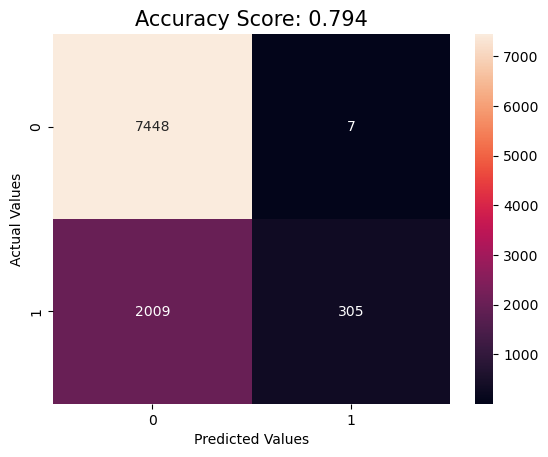

In [7]:
predictions = rf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

##### Precision, recall, f1-score değerlerini buluyoruz.

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      7455
        >50K       0.98      0.13      0.23      2314

    accuracy                           0.79      9769
   macro avg       0.88      0.57      0.56      9769
weighted avg       0.83      0.79      0.73      9769



##### Oluşturulan karar ağacını görselleştiriyoruz.

In [9]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

d_tree99 = rf.estimators_[99]
dot_data1 = StringIO()
export_graphviz(d_tree99, feature_names = X.columns,
               out_file = dot_data1, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph.write_png('rf_5b.png')
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x14\x00\x00\x02\x0f\x08\x02\x00\x00\x00\x14\xd0\…

##### Sınıflandırma modeli kurulurken yapılan öznitelik önem sıralamasını görselleştiriyoruz.

              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      7455
        >50K       0.79      0.53      0.63      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769



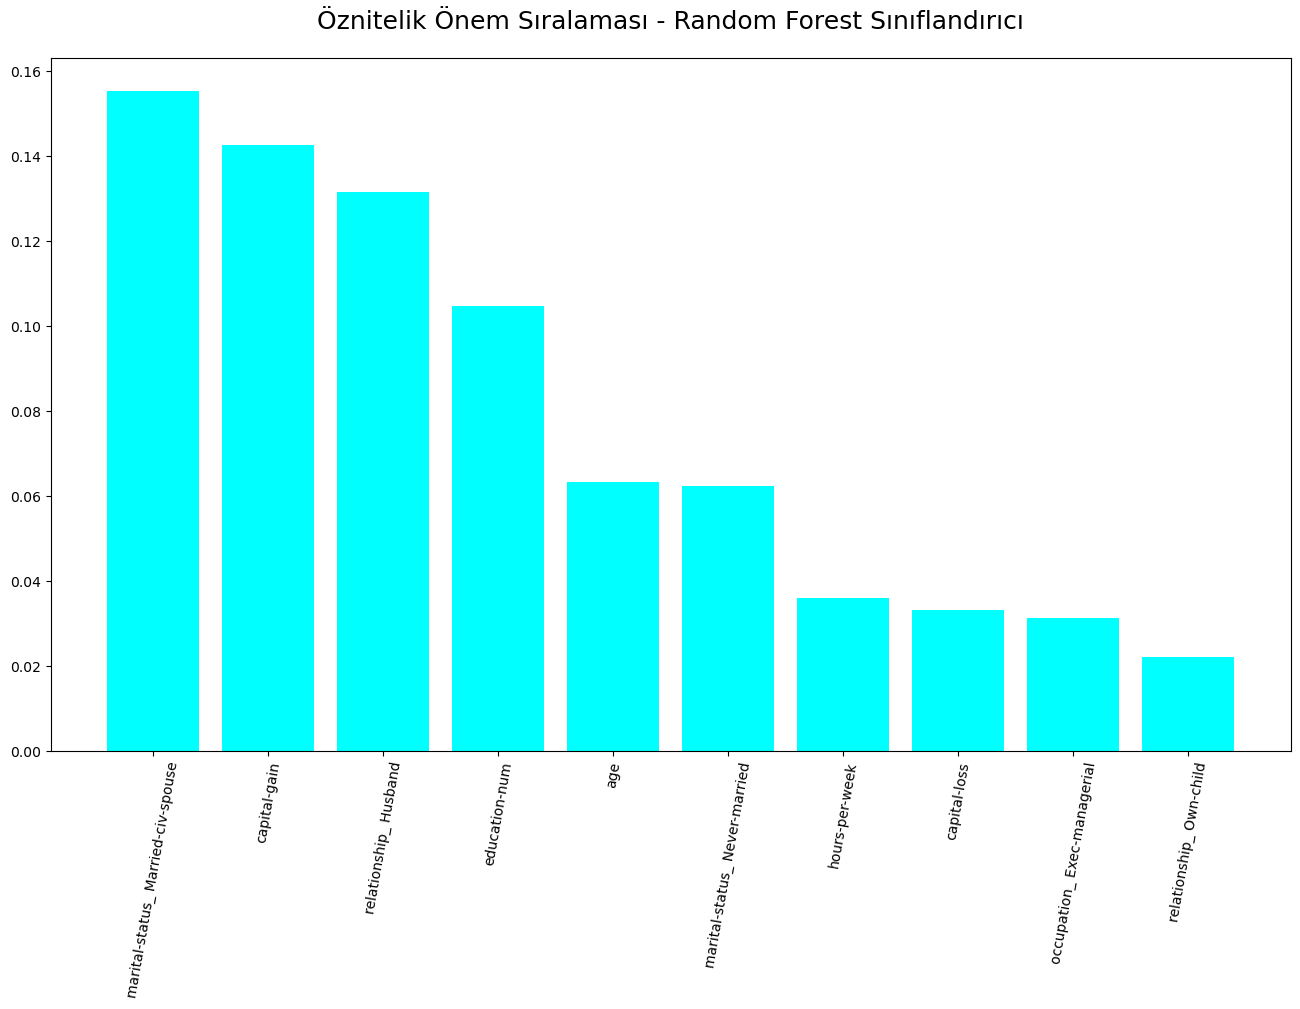

In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))
plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Öznitelik Önem Sıralaması - Random Forest Sınıflandırıcı", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

Bu şekilde Rastgele Orman kullanarak bir sınıflandırma işlemi yapmış olduk.